# San Diego Beachwatch Data Exploration

Open questions

- Whte are the most consistently low-count stations
- What are the most consistently high-count stations?
- What are the spikyest stations?
- Are different bacterial counts at one station correlated? Can the be combined into a single index?
- Are counts at nearby stations correlated?

In [1]:
import metapack as mp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import missingno as msno

In [2]:
pkg = mp.jupyter.open_package()
pkg

In [3]:
pkg.resource('beachwatch-sd')

Header,Type,Description
program,string,
parentproject,string,
project,string,
stationname,string,
stationcode,string,
sampledate,date,
collectiontime,time,
locationcode,string,
collectiondepth,integer,
unitcollectiondepth,string,


In [4]:
df = pkg.resource('beachwatch-sd').read_csv(parse_dates=True)


In [5]:
len(df)

202257

In [6]:
df.columns

Index(['program', 'parentproject', 'project', 'stationname', 'stationcode',
       'sampledate', 'collectiontime', 'locationcode', 'collectiondepth',
       'unitcollectiondepth', 'sampletypecode', 'collectionreplicate',
       'resultsreplicate', 'labbatch', 'labsampleid', 'matrixname',
       'methodname', 'analyte', 'unit', 'result', 'observation', 'mdl', 'rl',
       'resultqualcode', 'qacode', 'batchverification', 'compliancecode',
       'samplecomments', 'collectioncomments', 'resultscomments',
       'batchcomments', 'eventcode', 'protocolcode', 'sampleagency',
       'groupsamples', 'collectionmethodname', 'targetlatitude',
       'targetlongitude', 'collectiondevicedescription', 'calibrationdate',
       'positionwatercolumn', 'preppreservationname', 'preppreservationdate',
       'digestextractmethod', 'digestextractdate', 'analysisdate',
       'dilutionfactor', 'expectedvalue', 'labagency', 'submittingagency',
       'submissioncode', 'occupationmethod', 'startingbank',
  

In [7]:
# Generate markdown so I can put it into the README
import tabulate

print(tabulate.tabulate(df.analyte.value_counts().to_frame(), tablefmt="markdown", headers="keys"))

                   analyte
---------------  ---------
Coliform, Total      66992
Coliform, Fecal      65827
Enterococcus         65010
E. coli               4428


In [8]:
msno.matrix(df.sample(1000)[df.columns[:40]])

In [9]:
msno.matrix(df.sample(1000)[df.columns[40:]])

# Geographic Analysis

In [10]:
from shapely.geometry import Point
import geopandas as gpd

## Create a new GeoPandas frame, converting the targetlongitude and targetlatitude
## colums to a Shapely Point and assigning it to the frame's geometry

gdf = gpd.GeoDataFrame(df, geometry=
                        [Point(x,y) for x,y in zip(df.targetlongitude, df.targetlatitude)])
gdf.plot()

In [11]:

## Load a Metapack data package of the US COunties, then extract San Diego county by it's FIPS code, state=6
## county=73 
counties_pkg = mp.open_package('http://library.metatab.org/census.gov-counties-2017-2.csv')

# Use the Metapack feature for turning the Pandas dataframe into a GeoPandas dataframe
counties = counties_pkg.resource('counties').geoframe()

sd_county = counties[(counties.statefp==6) & (counties.countyfp==73) ]

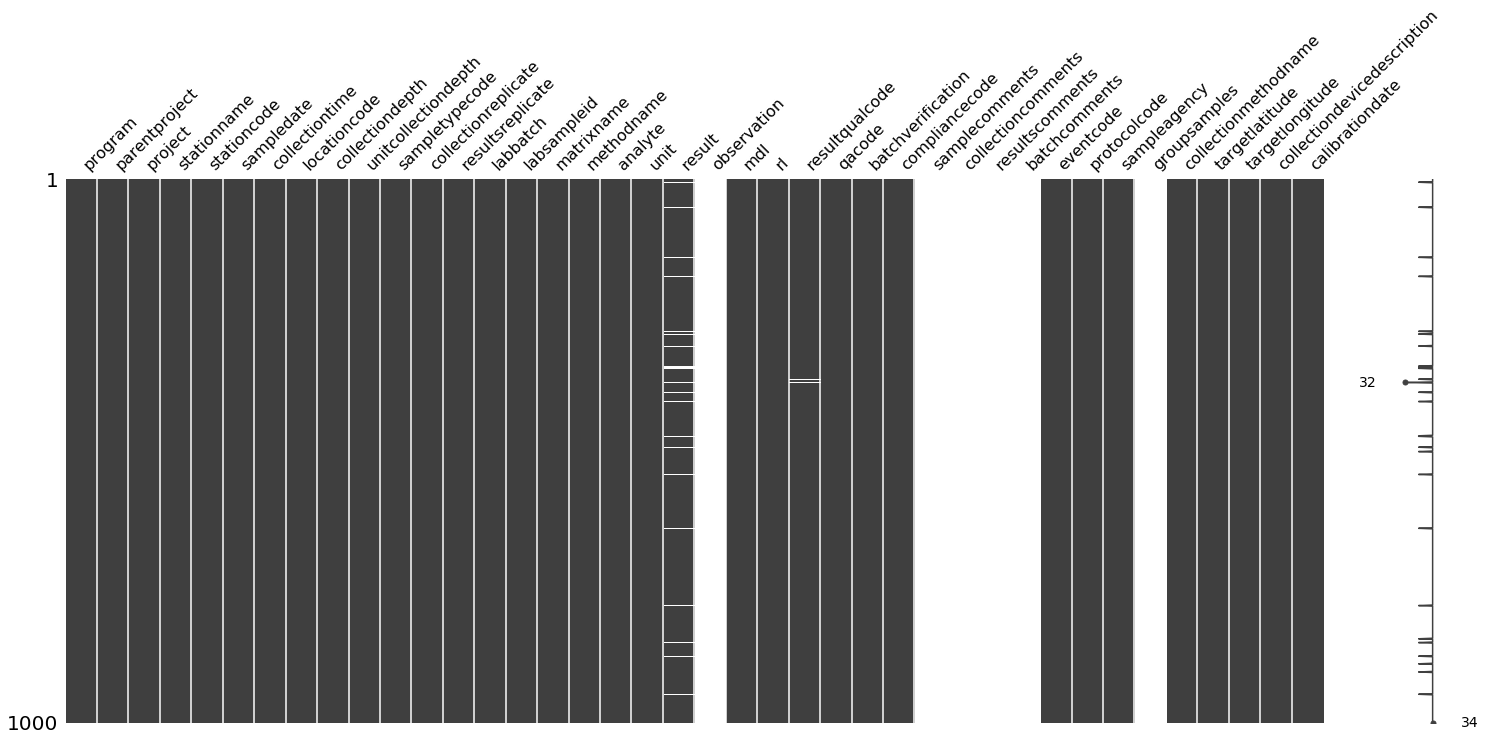

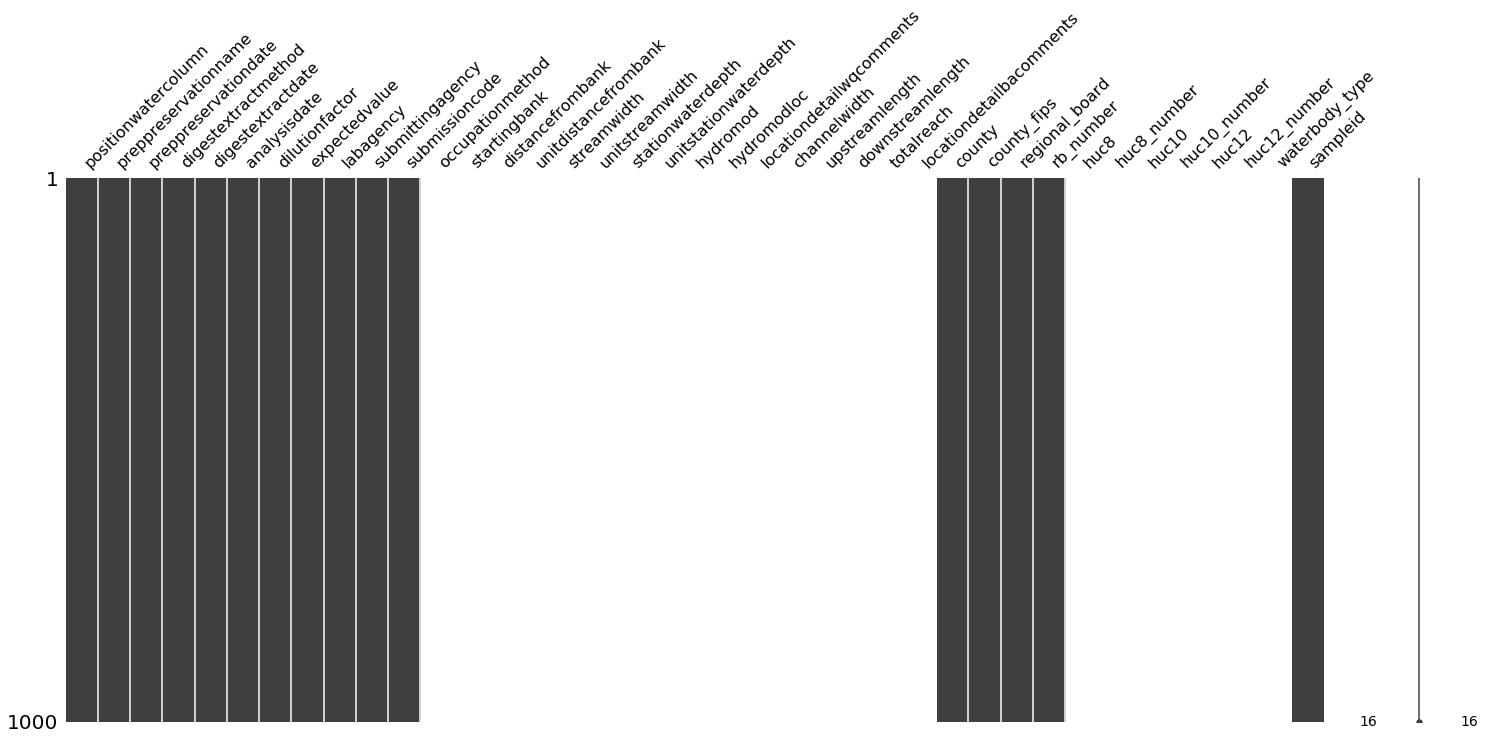

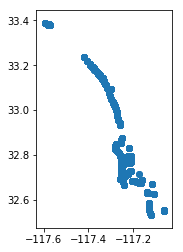

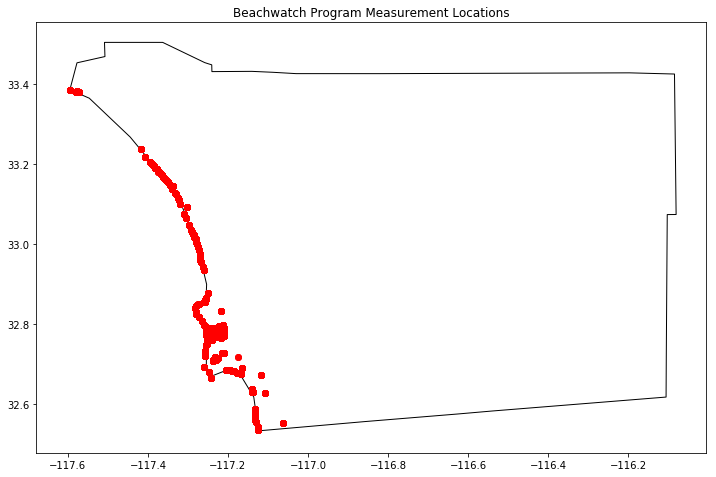

In [12]:

## Plot the county, then use the same Matplotlib axis to plot the points. 
base = sd_county.plot(color='white', edgecolor='black', figsize=(8*1.5,8))
gdf.plot(ax=base, color='red')
plt.title("Beachwatch Program Measurement Locations")
plt.show()

In [13]:
def event_time_plot(df,yaxis='StationName'):
    from datetime import datetime
    import matplotlib.pyplot as plt
    import matplotlib.dates as dt

    _ = df[(df.sampledate > pd.datetime(1980,1,1))].copy()

    _['secs_since_epoch'] = (_.sampledate
                             - pd.datetime(1970,1,1))

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax = plt.plot(_.sampledate, _[yaxis], marker='|', markersize=2, linestyle='None')

In [14]:
event_time_plot(df, 'stationname')

In [15]:
df.date.min(), df.date.max()

AttributeError: 'DataFrame' object has no attribute 'date'

In [ ]:
df.groupby('stationname').result.count().sort_values(ascending=False)

In [ ]:
df.groupby('stationname').date.min().sort_values()

In [ ]:
df.groupby('stationname').date.max().sort_values()

In [ ]:
df[(df.stationname == 'FM-010-Dog Beach, O.B., San Diego') & (df.analyte == 'Coliform, Fecal')].result.plot()

In [ ]:

df[(df.stationname == 'PL-090-Ocean Beach, San Diego') & (df.analyte == 'Coliform, Fecal')].result.plot()

In [ ]:
df.stationcode